In [1]:
import os
import sys

import itertools
import pickle
import imageio
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

sys.path.append('../')
import utils
%matplotlib inline

In [2]:
if not os.path.isdir('MNIST_AAE_results'):
    os.mkdir('MNIST_AAE_results')
if not os.path.isdir('MNIST_AAE_results/Random_results'):
    os.mkdir('MNIST_AAE_results/Random_results')
if not os.path.isdir('MNIST_AAE_results/Fixed_results'):
    os.mkdir('MNIST_AAE_results/Fixed_results')

In [3]:
lr = 0.0002
prior_size = 10
batch_size = 256
train_epoch = 1000

In [4]:
normalize = ((0.5,), (0.5,))
train_loader = utils.loader(batch_size=batch_size, train=True, normalize=normalize, path='../dataset')
test_loader = utils.loader(batch_size=batch_size, train=False, normalize=normalize, path='../dataset')

In [5]:
def show_result(num_epoch, prior_size, show=False, save=False, path='result.png', isFix=False):
    z_prior = torch.randn((5*5, prior_size))
    z_prior = Variable(z_prior, volatile=True)

    G.eval()
    if isFix:
        test_images = G(fixed_z)
    else:
        test_images = G(z_prior)
        
    G.train()

    size_figure_grid = 5
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(5*5):
        i = k // 5
        j = k % 5
        ax[i, j].cla()
        ax[i, j].imshow(test_images[k, :].data.view(28, 28).numpy(), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')
    
    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()
        

def show_train_hist(hist, show=False, save=False, path='Train_hist.png'):
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

In [6]:
class encoder(nn.Module):
    def __init__(self, output_size=10):
        super(encoder, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, output_size)
    
    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
class generator(nn.Module):
    def __init__(self, input_size=10,):
        super(generator, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 28*28)

    def forward(self, x):
        x = F.tanh(x)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        
        return x

In [8]:
class discriminator(nn.Module):
    def __init__(self, input_size=10):
        super(discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.dropout(x, 0.3)
        x = F.tanh(self.fc2(x))
        x = F.dropout(x, 0.3)
        x = self.fc3(x)

        return x

In [9]:
fixed_z = torch.randn((5 * 5, prior_size))    # fixed noise
fixed_z = Variable(fixed_z, volatile=True)

# networks
E = encoder(output_size=prior_size)
G = generator(input_size=prior_size)
D = discriminator(input_size=prior_size)

# losses
BCE_loss = nn.BCEWithLogitsLoss()
MSE_loss = nn.MSELoss()

# optimizers
E_optimizer = optim.Adam(E.parameters(), lr=lr)
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)

[1/1000]: loss_d: 0.630, loss_ae: 0.559, loss_e: 0.865


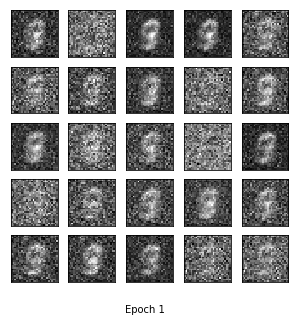

[2/1000]: loss_d: 0.657, loss_ae: 0.362, loss_e: 0.763


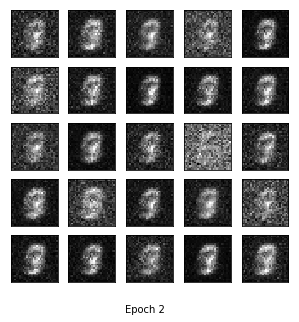

[3/1000]: loss_d: 0.658, loss_ae: 0.298, loss_e: 0.872


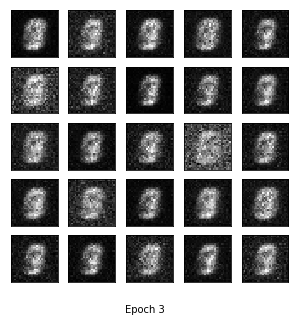

[4/1000]: loss_d: 0.562, loss_ae: 0.284, loss_e: 0.853


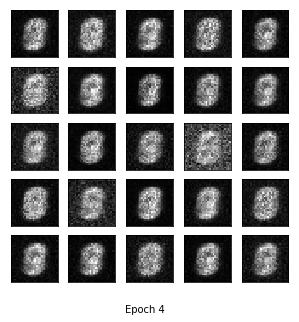

[5/1000]: loss_d: 0.643, loss_ae: 0.291, loss_e: 0.727


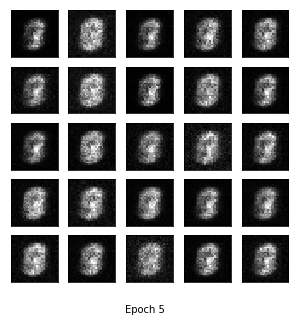

[6/1000]: loss_d: 0.493, loss_ae: 0.273, loss_e: 1.060


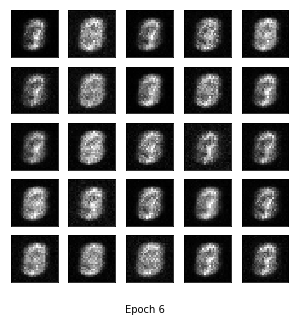

[7/1000]: loss_d: 0.572, loss_ae: 0.274, loss_e: 0.805


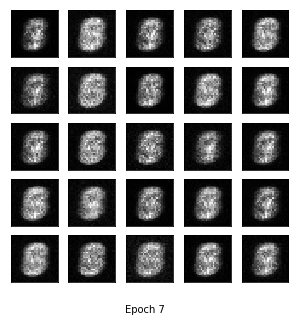

[8/1000]: loss_d: 0.614, loss_ae: 0.272, loss_e: 0.710


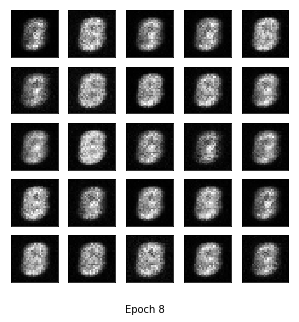

[9/1000]: loss_d: 0.619, loss_ae: 0.270, loss_e: 0.731


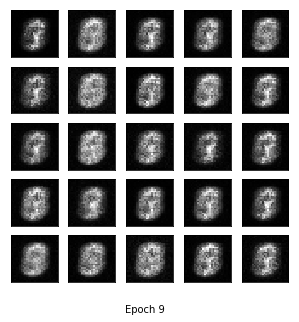

[10/1000]: loss_d: 0.554, loss_ae: 0.270, loss_e: 0.802


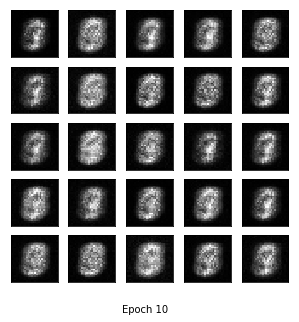

[11/1000]: loss_d: 0.600, loss_ae: 0.270, loss_e: 0.711


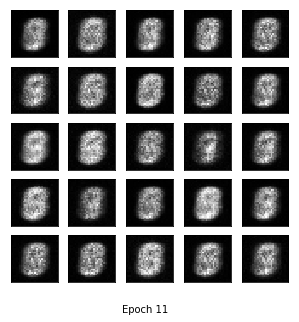

[12/1000]: loss_d: 0.586, loss_ae: 0.270, loss_e: 0.714


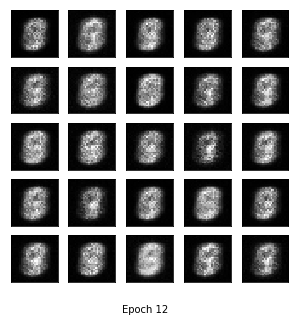

[13/1000]: loss_d: 0.706, loss_ae: 0.270, loss_e: 0.574


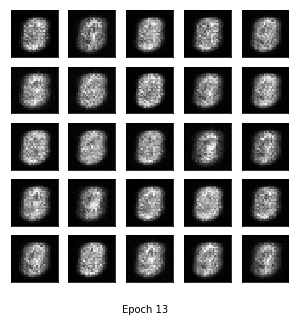

[14/1000]: loss_d: 0.807, loss_ae: 0.270, loss_e: 0.537


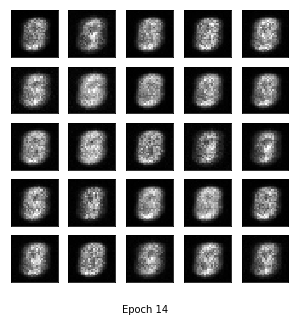

[15/1000]: loss_d: 0.785, loss_ae: 0.270, loss_e: 0.636


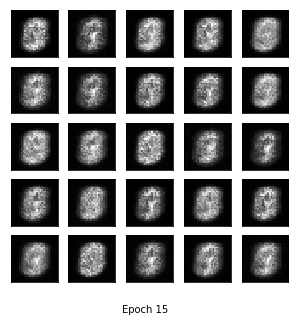

[16/1000]: loss_d: 0.769, loss_ae: 0.269, loss_e: 0.704


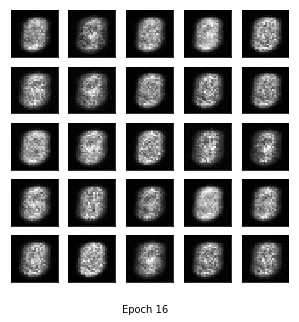

[17/1000]: loss_d: 0.758, loss_ae: 0.269, loss_e: 0.709


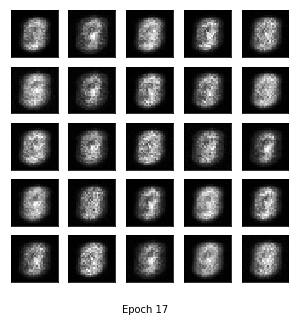

[18/1000]: loss_d: 0.733, loss_ae: 0.269, loss_e: 0.759


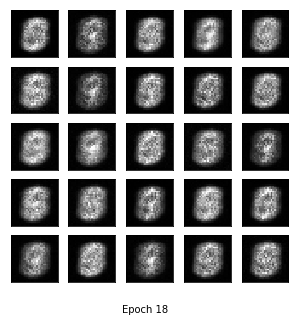

[19/1000]: loss_d: 0.731, loss_ae: 0.266, loss_e: 0.733


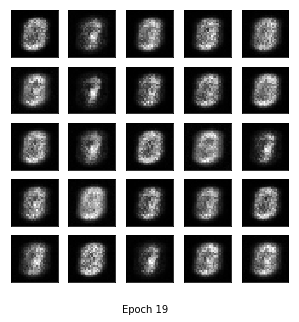

[20/1000]: loss_d: 0.712, loss_ae: 0.263, loss_e: 0.756


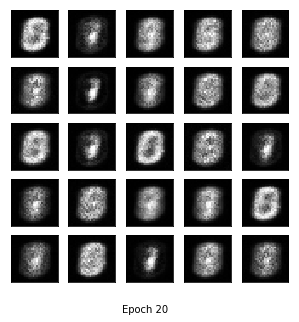

[21/1000]: loss_d: 0.716, loss_ae: 0.254, loss_e: 0.727


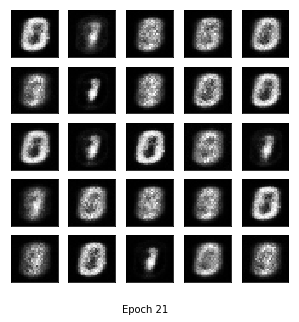

[22/1000]: loss_d: 0.711, loss_ae: 0.249, loss_e: 0.720


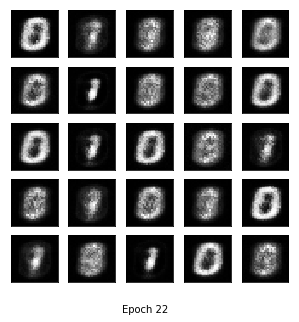

[23/1000]: loss_d: 0.710, loss_ae: 0.248, loss_e: 0.704


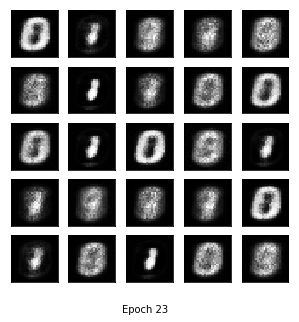

[24/1000]: loss_d: 0.701, loss_ae: 0.248, loss_e: 0.721


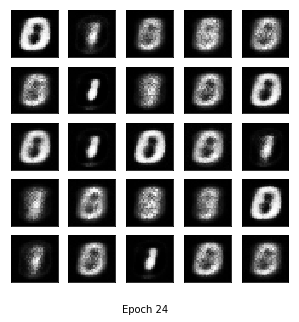

[25/1000]: loss_d: 0.712, loss_ae: 0.247, loss_e: 0.687


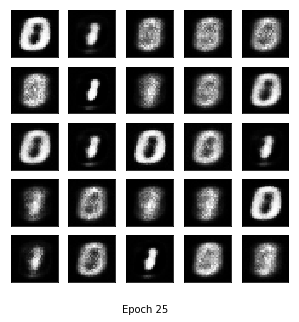

[26/1000]: loss_d: 0.710, loss_ae: 0.247, loss_e: 0.681


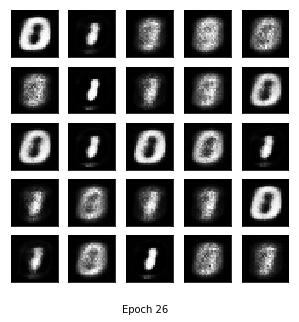

[27/1000]: loss_d: 0.709, loss_ae: 0.247, loss_e: 0.686


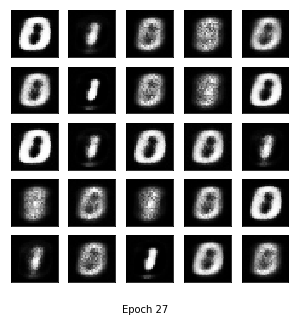

[28/1000]: loss_d: 0.705, loss_ae: 0.246, loss_e: 0.688


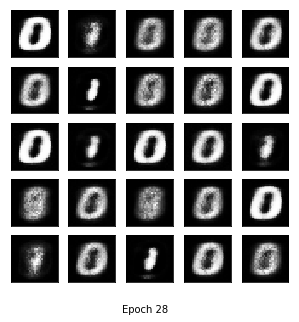

[29/1000]: loss_d: 0.702, loss_ae: 0.247, loss_e: 0.714


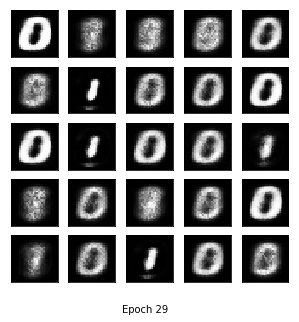

[30/1000]: loss_d: 0.707, loss_ae: 0.246, loss_e: 0.676


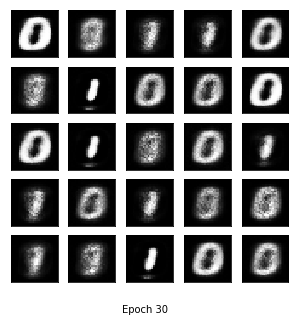

[31/1000]: loss_d: 0.698, loss_ae: 0.247, loss_e: 0.681


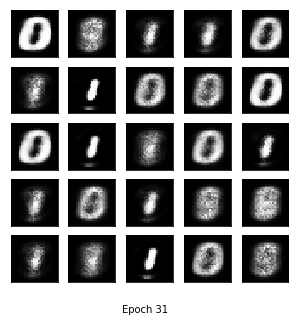

[32/1000]: loss_d: 0.703, loss_ae: 0.246, loss_e: 0.687


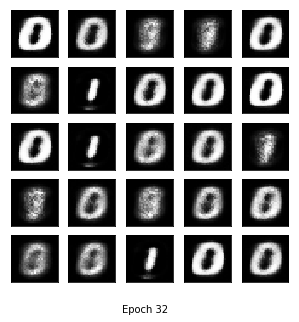

[33/1000]: loss_d: 0.703, loss_ae: 0.244, loss_e: 0.669


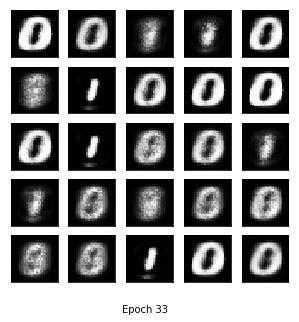

[34/1000]: loss_d: 0.708, loss_ae: 0.242, loss_e: 0.697


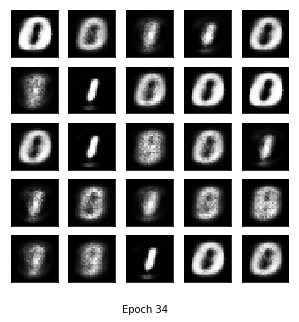

[35/1000]: loss_d: 0.711, loss_ae: 0.243, loss_e: 0.720


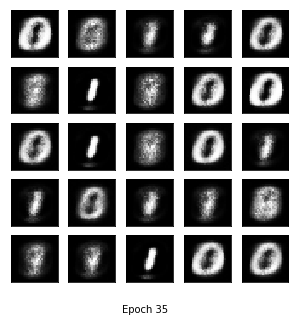

[36/1000]: loss_d: 0.683, loss_ae: 0.246, loss_e: 0.735


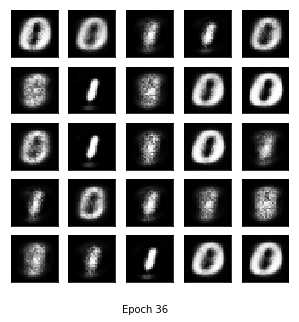

[37/1000]: loss_d: 0.675, loss_ae: 0.247, loss_e: 0.699


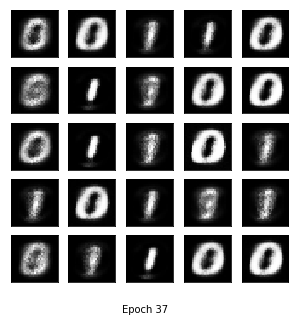

[38/1000]: loss_d: 0.681, loss_ae: 0.249, loss_e: 0.662


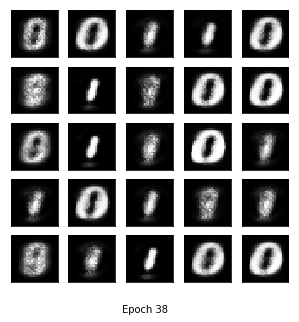

[39/1000]: loss_d: 0.711, loss_ae: 0.248, loss_e: 0.624


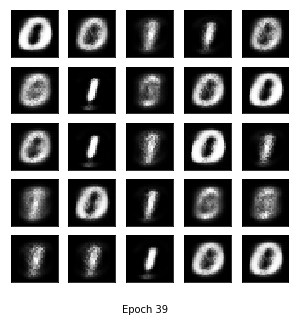

[40/1000]: loss_d: 0.710, loss_ae: 0.245, loss_e: 0.690


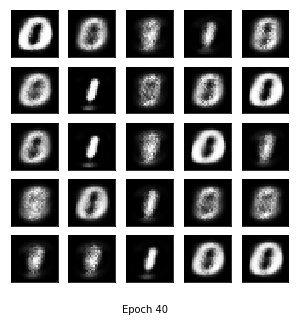

[41/1000]: loss_d: 0.703, loss_ae: 0.245, loss_e: 0.741


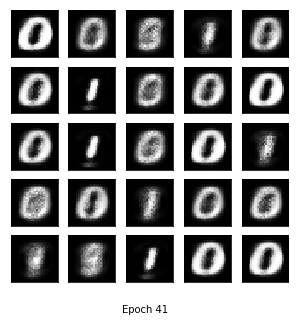

[42/1000]: loss_d: 0.717, loss_ae: 0.244, loss_e: 0.672


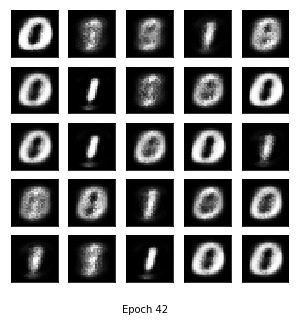

[43/1000]: loss_d: 0.701, loss_ae: 0.244, loss_e: 0.726


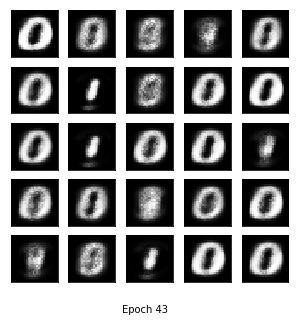

[44/1000]: loss_d: 0.703, loss_ae: 0.242, loss_e: 0.714


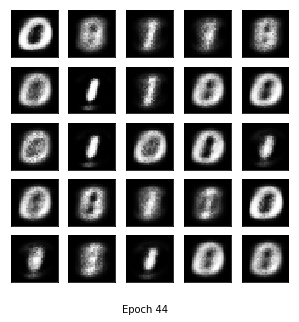

[45/1000]: loss_d: 0.700, loss_ae: 0.244, loss_e: 0.719


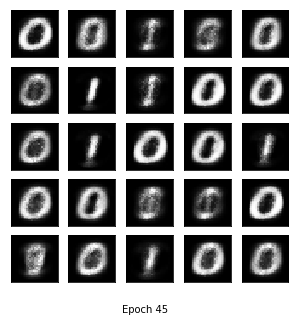

[46/1000]: loss_d: 0.701, loss_ae: 0.244, loss_e: 0.679


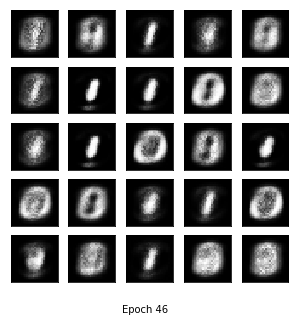

[47/1000]: loss_d: 0.692, loss_ae: 0.245, loss_e: 0.713


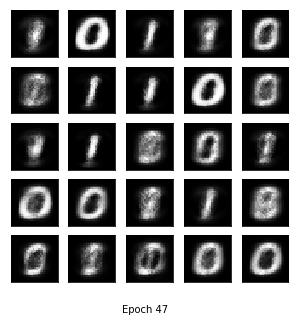

[48/1000]: loss_d: 0.714, loss_ae: 0.242, loss_e: 0.673


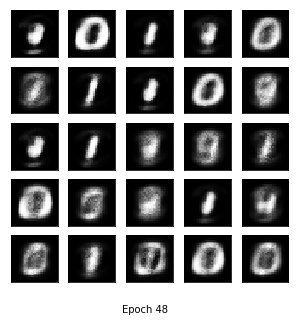

KeyboardInterrupt: 

In [10]:
train_hist = {}
train_hist['D_losses'] = []
train_hist['G_losses'] = []
train_hist['E_losses'] = []

for epoch in range(train_epoch):
    E_losses = []
    D_losses = []
    G_losses = []
    for x, _ in train_loader:
        # train discriminator D
        mini_batch = x.size()[0]
        z_prior = torch.randn((mini_batch, prior_size))
        z_prior = Variable(z_prior)
        x = x.view(-1, 28 * 28)

        E.zero_grad()
        D.zero_grad()
        G.zero_grad()
        
        y_real = torch.ones(mini_batch, 1)
        y_fake = torch.zeros(mini_batch, 1)

        x, y_real, y_fake = Variable(x), Variable(y_real), Variable(y_fake)
        
        z_encoded = E(x)
        
        D_real_loss = BCE_loss(D(z_prior), y_real)
        D_fake_loss = BCE_loss(D(z_encoded), y_fake)

        D_train_loss = (D_real_loss + D_fake_loss)*0.5

        D_train_loss.backward(retain_graph=True)
        D_optimizer.step()

        D_losses.append(D_train_loss.data[0])
        
        # train generator G and encoder E
        E.zero_grad()
        D.zero_grad()
        G.zero_grad()
        
        AE_loss = MSE_loss(G(z_encoded), x)
        A_loss = BCE_loss(D(z_encoded), y_real)
        # A_loss = BCE_loss(1-D(z_encoded), y_fake)
        
        AAE_train_loss = A_loss + AE_loss

        
        AAE_train_loss.backward()
        G_optimizer.step()
        E_optimizer.step()
        G_losses.append(AE_loss.data[0])
        E_losses.append(A_loss.data[0])
        

    E_loss_mean = torch.mean(torch.FloatTensor(E_losses))
    G_loss_mean = torch.mean(torch.FloatTensor(G_losses))
    D_loss_mean = torch.mean(torch.FloatTensor(D_losses))
    print('[%d/%d]: loss_d: %.3f, loss_ae: %.3f, loss_e: %.3f' % (
        (epoch + 1), train_epoch, D_loss_mean, G_loss_mean, E_loss_mean))
    p = 'MNIST_AAE_results/Random_results/MNIST_AAE_' + str(epoch + 1) + '.png'
    fixed_p = 'MNIST_AAE_results/Fixed_results/MNIST_AAE_' + str(epoch + 1) + '.png'
    show_result((epoch+1), prior_size=prior_size, save=True, path=p, isFix=False)
    show_result((epoch+1), prior_size=prior_size, save=True, show=True, path=fixed_p, isFix=True)
    train_hist['D_losses'].append(D_loss_mean)
    train_hist['G_losses'].append(G_loss_mean)
    train_hist['E_losses'].append(E_loss_mean)
    
print("Training finish!... save training results")
torch.save(G.state_dict(), "MNIST_AAE_results/generator_param.pkl")
torch.save(E.state_dict(), "MNIST_AAE_results/encoder_param.pkl")
torch.save(D.state_dict(), "MNIST_AAE_results/discriminator_param.pkl")
with open('MNIST_AAE_results/train_hist.pkl', 'wb') as f:
    pickle.dump(train_hist, f)

